# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

import warnings
warnings.filterwarnings ("ignore")

pd.set_option('display.max_rows', 500)

plt.style.use('fivethirtyeight')

# Load Data

In [2]:
dataset = pd.read_csv('bank.csv')

In [3]:
dataset.head()

,age,job,marital,education,defaults,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset = dataset.rename(columns={'deposit':'response'})

## Penjelasan Feature dan Target
### Data Customer Bank:
1 - age (numeric) : Umur customer

2 - job : Tipe dari pekerjaan Customer

3 - marital : Status perkawinan Customer

4 - education : Pendidikan Customer

5 - default: Memiliki kredit secara default?

6 - balance: Simpanan atau saldo yang dimiliki oleh customer.

7 - housing: Memiliki pinjaman rumah?

8 - loan: Memiliki pinjaman pribadi?
### Field yang berhubungan dengan campaign terakhir dilakukan
9 - contact: Type contact komunikasi

10 - month: Bulan terakhir dihubungi

11 - day: Hari terakhir ketika dihubungi

12 - duration: Durasi terakhir ketika dihubungi dalam detik. Catatan penting: Field ini sangat berefek pada output target Misalkan duration=0 then y='no'. Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah panggilan berakhir, y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

### Field lain:
13 - campaign: jumlah kontak yang dilakukan selama kampanye ini.

14 - pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya

15 - previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini

16 - poutcome: hasil dari kampanye pemasaran sebelumnya

### Target
17 response: target atau response customer dari marketing campaign

# Exploratory Data Analysis

## Data Exploration

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   defaults   11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  response   11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


1. Terlihat terdapat 10 kolom bertipe kategorikal dan 7 kolom bertipe numerik
2. Tidak terdapat missing value, karena jumlah data di setiap feature = jumlah row
3. Terdapat feature days yang memiliki type data yang tidak sesuai

In [6]:
#Split feature into categorical and numerical
data_kategorikal = dataset.dtypes[dataset.dtypes == 'object'].index
data_numerikal = dataset.dtypes[dataset.dtypes != 'object'].index

In [7]:
dataset[data_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


1. Terlihat feature age distribusinya cukup normal karena jarak antara mean dengan median tidak terlalu jauh, dan tidak ada invalid data values
2. Terlihat pada feature balance distribusinya skew positif karena mean > median, dan terdapat invalid data values karena terdapat nilai minus disini
3. Terlihat feature day distribusinya cukup normal karena jarak antara mean dengan median sangat dekat, dan tidak ada invalid data values
4. Terlihat feature duration distribusinya skew positif karena mean > median, dan tidak terdapat invalid data values
5. Terlihat feature campaign berdistribusi cukup normal karena karena jarak antara mean dengan median sangat dekat dan tidak ada invalid data values
6. Terlihat pada feature pdays distribusinya skew positif karena mean > median, dan terdapat invalid data values karena terdapat nilai minus disini
7. Terlihat pada feature previous distribusinya cukup skew positf karena mean > median, dan tidak terdapat invalid data values.

In [8]:
dataset[data_kategorikal].describe().transpose()

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
defaults,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
response,11162,2,no,5873


Terlihat secara keselurhan tidak ada invalid data values dari setiap feature kategorikal karena jumlah unique values sudah sesuai.

In [9]:
#Cek unique values
for cols in data_kategorikal:
    print ("Unique value dari kolom {} adalah: \n".format(cols), dataset[cols].unique())

Unique value dari kolom job adalah: 
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique value dari kolom marital adalah: 
 ['married' 'single' 'divorced']
Unique value dari kolom education adalah: 
 ['secondary' 'tertiary' 'primary' 'unknown']
Unique value dari kolom defaults adalah: 
 ['no' 'yes']
Unique value dari kolom housing adalah: 
 ['yes' 'no']
Unique value dari kolom loan adalah: 
 ['no' 'yes']
Unique value dari kolom contact adalah: 
 ['unknown' 'cellular' 'telephone']
Unique value dari kolom month adalah: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique value dari kolom poutcome adalah: 
 ['unknown' 'other' 'failure' 'success']
Unique value dari kolom response adalah: 
 ['yes' 'no']


In [10]:
dataset.duplicated().sum()

0

Tidak terdapat duplicate data

## Univariate Analysis

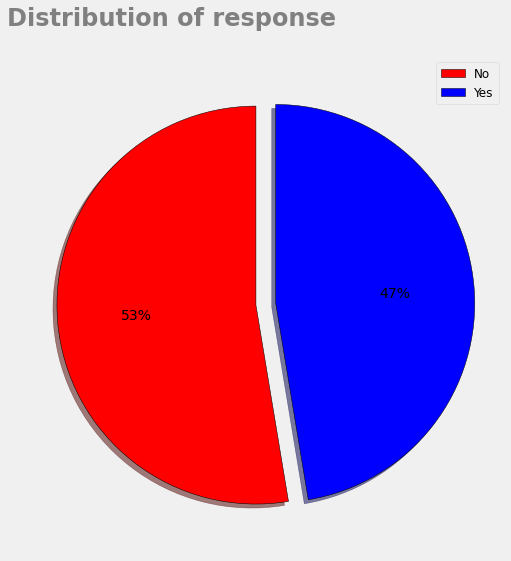

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
data = dataset['response'].value_counts()
plt.title('Distribution of response', fontsize = 24, color = 'grey', loc = 'left', y = 1.05, weight = 'bold' )
plt.pie(data, startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=(0, 0.1), shadow=True, colors = ['red', 'blue'])
plt.legend(loc='best', labels=['No', 'Yes'], fontsize=12)
plt.tight_layout()
plt.show()

Terlihat distribusi dari target cukup seimbang.

In [12]:
job = dataset.job.value_counts().reset_index()
job.columns = ['job', 'frequency']

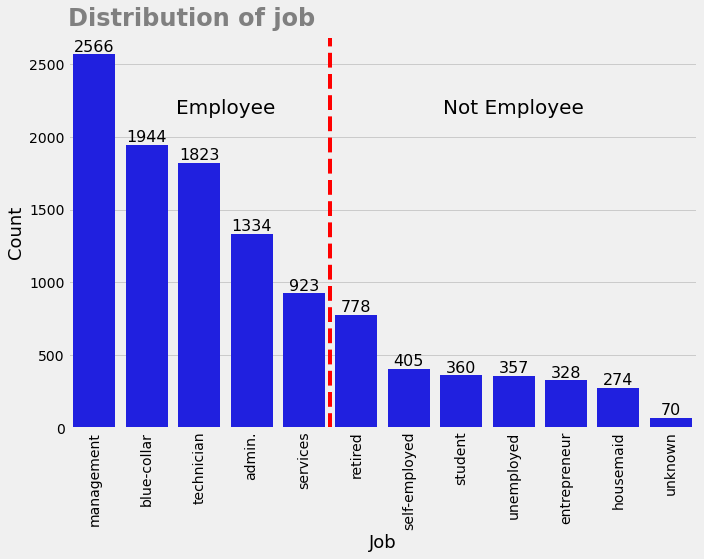

In [13]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'job', y = 'frequency', data = job, color = 'blue')
plt.title('Distribution of job', fontsize = 24, weight = 'bold', color = 'gray', loc = 'left', y= 1.01)
plt.xlabel('Job', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation= 90)
for index in range (0, job.shape[0]):
    plt.text(
                x = index, 
                y = job['frequency'][index] + 20, 
                s = '{}'.format(job['frequency'][index]),
                fontsize = 16,
                ha = 'center'
            )
plt.text(x = 2.5, y = 2200, s = 'Employee', fontsize = 20, ha = 'center', va = 'center')
plt.text(x = 8, y = 2200, s = 'Not Employee', fontsize = 20, ha = 'center', va = 'center')
plt.axvline(4.5, color='red', linestyle='--', ymin=0, ymax=1)
plt.tight_layout()
plt.show()

Terlihat yang lebih mendominan adala tipe pekerja di suatu perusahaan.

In [14]:
marital = dataset['marital'].value_counts().sort_values(ascending=False).reset_index()
marital.columns = ['marital', 'frequency']

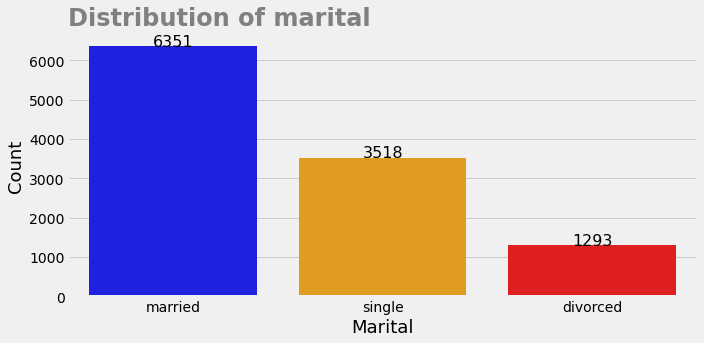

In [15]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'marital', y = 'frequency', data = marital, palette= ['blue', 'orange', 'red'])
plt.title('Distribution of marital', fontsize = 24, weight = 'bold', color = 'gray', loc = 'left', y= 1.01)
plt.xlabel('Marital', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
for index in range (0, marital.shape[0]):
    plt.text(
                x = index, 
                y = marital['frequency'][index] + 20, 
                s = '{}'.format(marital['frequency'][index]),
                fontsize = 16,
                ha = 'center'
            )
plt.tight_layout()
plt.show()

Terlihat status perkawinan yang lebih mendominan adalah tipe married.

In [16]:
education = dataset['education'].value_counts().sort_values(ascending=False).reset_index()
education.columns = ['education', 'frequency']

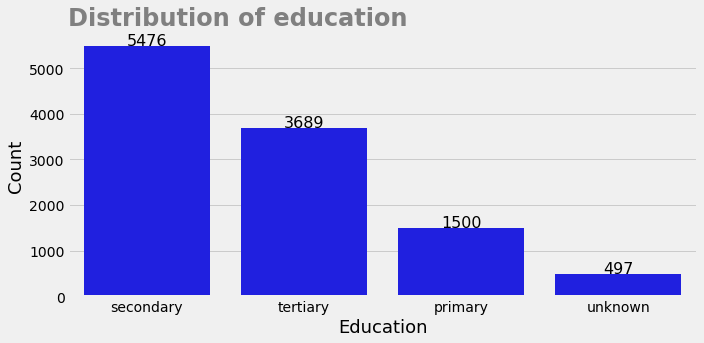

In [17]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'education', y = 'frequency', data = education, color = 'blue')
plt.title('Distribution of education', fontsize = 24, weight = 'bold', color = 'gray', loc = 'left', y= 1.01)
plt.xlabel('Education', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
for index in range (0, education.shape[0]):
    plt.text(
                x = index, 
                y = education['frequency'][index] + 20, 
                s = '{}'.format(education['frequency'][index]),
                fontsize = 16,
                ha = 'center'
            )
plt.tight_layout()
plt.show()

Terlihat bahwa jenis education yang mendominasi adalah jenis education secondary

In [18]:
contact = dataset['contact'].value_counts().sort_values(ascending=False).reset_index()
contact.columns = ['contact', 'frequency']

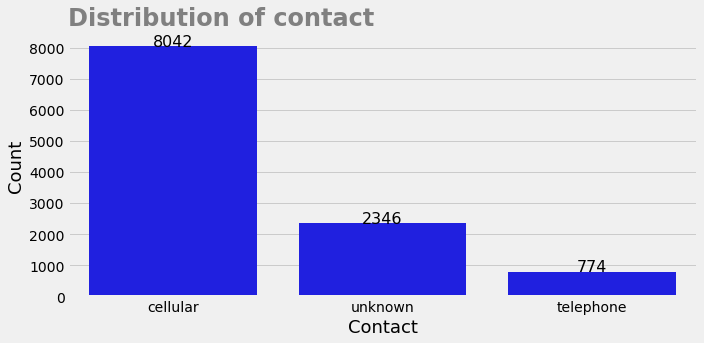

In [19]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'contact', y = 'frequency', data = contact, color = 'blue')
plt.title('Distribution of contact', fontsize = 24, weight = 'bold', color = 'gray', loc = 'left', y= 1.01)
plt.xlabel('Contact', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
for index in range (0, contact.shape[0]):
    plt.text(
                x = index, 
                y = contact['frequency'][index] + 20, 
                s = '{}'.format(contact['frequency'][index]),
                fontsize = 16,
                ha = 'center'
            )
plt.tight_layout()
plt.show()

* Terlihat bahwa jenis cellular yang mendominasi

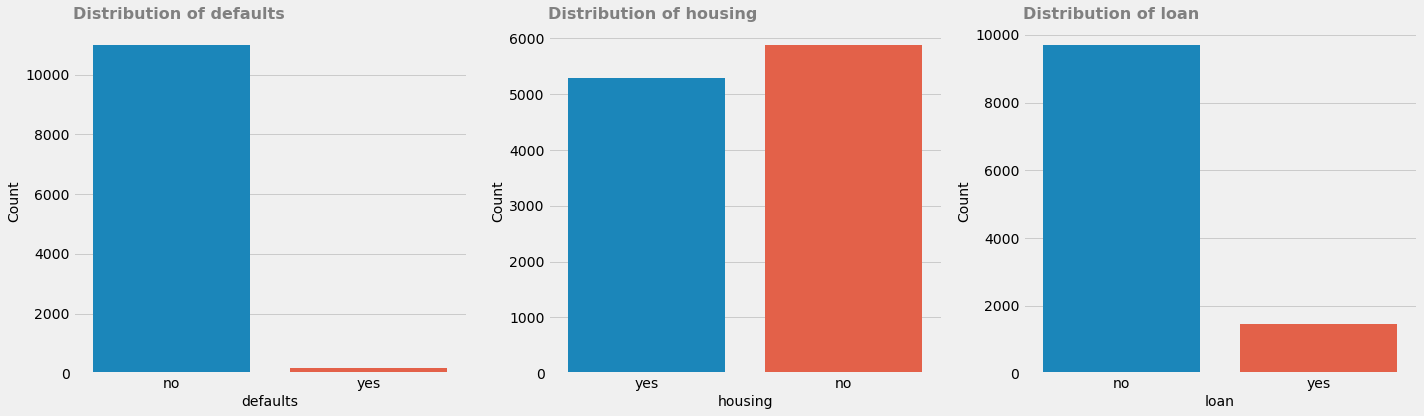

In [20]:
## Distribution of Default, Housing and loan
features = ['defaults', 'housing', 'loan']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for index in range(0, len(features)):
    plt.subplot(1, 3, index+1)
    sns.countplot(dataset[features[index]])
    plt.title('Distribution of {}'.format(features[index]), fontsize = 16, loc = 'left', weight = 'bold', y = 1.01, color = 'grey')
    plt.xlabel(features[index], fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    
plt.tight_layout()    
plt.show()

* Berdasarkan grafik di atas kita ketahui bahwa customer secara umum tidak memiliki kredit.
* Perbandingan antara customer memiliki pinjaman rumah atau tidak, cukup seimbang
* Kemudian, perbandingan antara customer memiliki pinjaman atau tidak, lebih dominan customer yang tidak memiliki pinjaman.

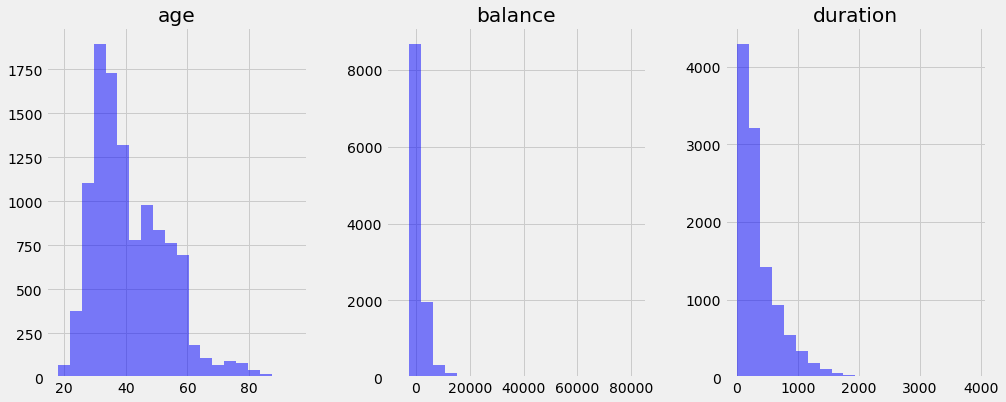

In [21]:
numerical_features = ['age', 'balance', 'duration']

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dataset[numerical_features].hist(bins=20, color = 'Blue', alpha=0.5, ax=ax)
plt.show()

* Terlihat bahwa density dari umur berada dalam interval 25 sampai 70 tahun.
* Terlihat bahwa density dari balance adalah kurang dari 15000.
* Terlihat bahwa density dari duration adalah kurang dari 1000 detik.

In [22]:
def age_category (x):
    if x < 32:
        return 'Anak Muda'
    elif x >= 32 and x <= 49:
        return 'Dewasa'
    else:
        return 'Lansia'
    
dataset['age_category'] = dataset['age'].apply(lambda x: age_category(x))

dataset['age_category'].value_counts()/dataset.shape[0]

Dewasa       0.537001
Lansia       0.238756
Anak Muda    0.224243
Name: age_category, dtype: float64

In [23]:
def balance_category (x):
    if x < 122:
        return 'Low'
    elif x >= 122 and x <= 550:
        return 'Medium'
    else:
        return 'High'
    
dataset['balance_category'] = dataset['balance'].apply(lambda x: balance_category(x))

dataset['balance_category'].value_counts()/dataset.shape[0]

High      0.499821
Medium    0.250851
Low       0.249328
Name: balance_category, dtype: float64

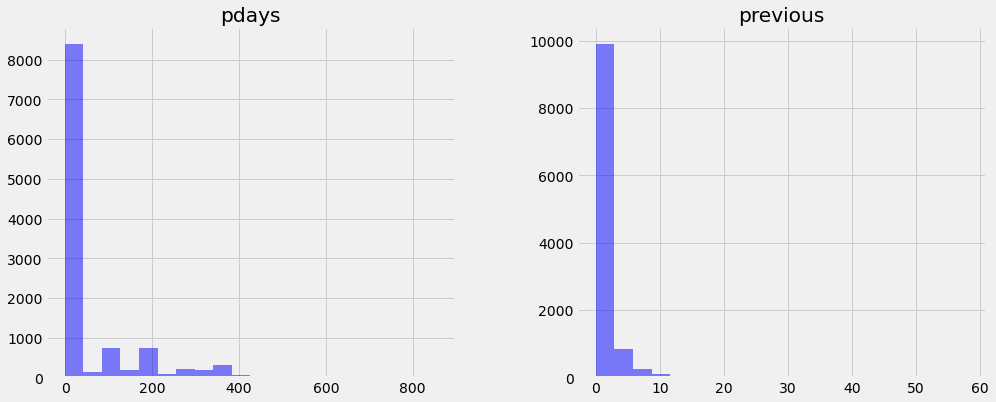

In [24]:
numerical_features = ['pdays', 'previous']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
dataset[numerical_features].hist(bins=20, color = 'Blue', alpha=0.5, ax=ax)
plt.show()

## Bivariate Analysis

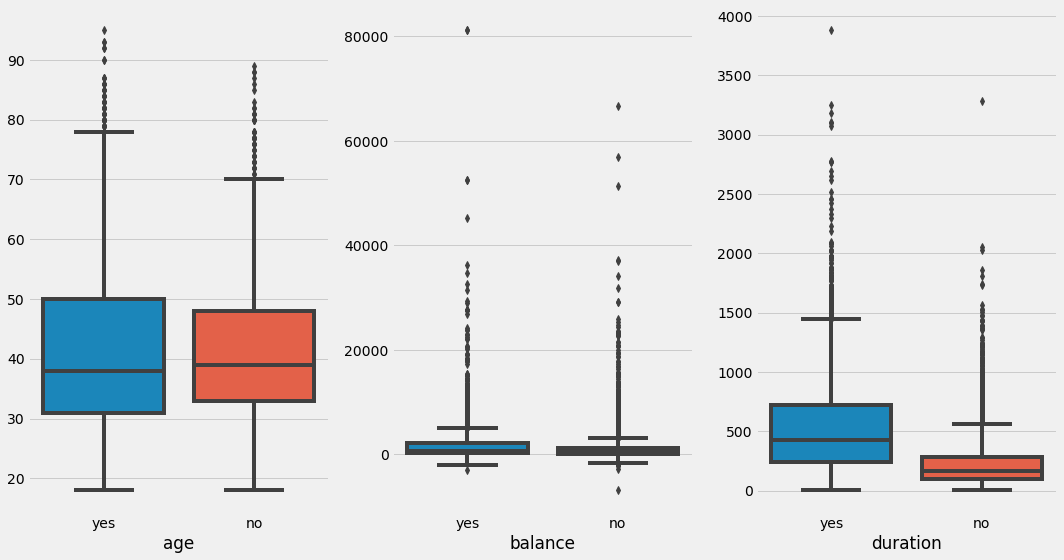

In [25]:
numerical_features = ['age', 'balance', 'duration']

plt.figure(figsize = (15, 8))
for i in range(0, len(numerical_features)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x= 'response', y = numerical_features[i], data = dataset, orient = 'v')
    plt.xlabel(numerical_features[i])
    plt.ylabel(None)

plt.tight_layout()
plt.show()

* Terlihat bahwa pada umur seorang customer tidak ada kecenderungan appaun dalam response campaign.
* Terlihat bahwa distribusi dari balace tidak ada kecenderungan apapun dalam response campaign.
* Terlihat bahwa semakin kecil duration melakukan campaign, maka semakin besar kemungkinan untuk menolak marketing campaign.

In [26]:
dataset['Id'] = dataset.index

In [27]:
#Create function for create data frame target
def create_df_target_rate(df, feature, target):
    final_df = df.groupby([feature, target])['Id'].nunique().reset_index()
    final_df.columns = [feature, target, 'Amount']
    final_df['Total'] = final_df.groupby([feature])['Amount'].transform('sum')
    final_df['Rate'] = final_df['Amount']/final_df['Total'] * 100
    final_df = pd.pivot_table(final_df, index = [feature], columns = [target], values = ['Rate']).reset_index()
    
    return final_df

In [28]:
proportion_job = create_df_target_rate(dataset, 'job', 'response')
proportion_marital = create_df_target_rate(dataset, 'marital', 'response')
proportion_education = create_df_target_rate(dataset, 'education', 'response')

In [29]:
len(proportion_job)

12

<Figure size 720x1440 with 0 Axes>

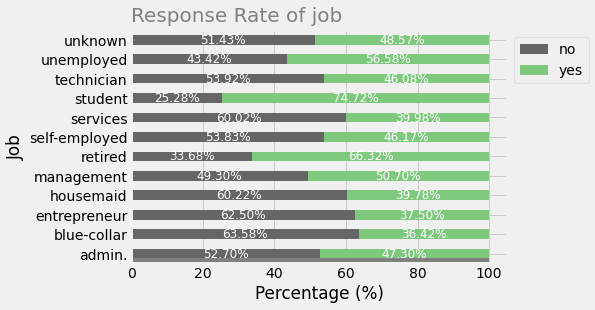

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_job.plot(x = 'job', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of job', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Job')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_job)):
        plt.text(x = proportion_job['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_job['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_job['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_job['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

<Figure size 720x1440 with 0 Axes>

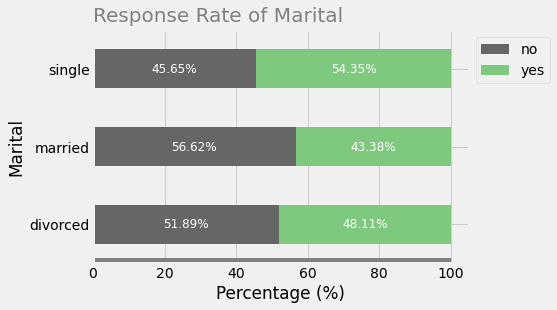

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_marital.plot(x = 'marital', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of Marital', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Marital')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_marital)):
        plt.text(x = proportion_marital['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_marital['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_marital['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_marital['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

<Figure size 720x1440 with 0 Axes>

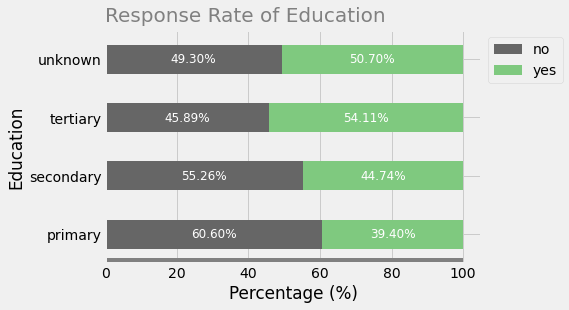

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_education.plot(x = 'education', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of Education', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Education')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_education)):
        plt.text(x = proportion_education['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_education['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_education['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_education['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

* Berdasarkan hasil EDA di atas walaupun jenis pekerjaan management lebih banyak yang dilakukan campaign, tertapi proporsi campaign akan cenderung berhasil pada pekerjaan pelajar, dan para pensiunan.
* Berdasarkan hasil EDA diatas walaupun status perkawianan menikah lebih banyak yang dilakukan campaign, tetapi proporsi campaign akan cenderung berhasil pada status perkawinan single.
* Berdasarkan hasil EDA diatas walaupun jenis pendidikan secondary lebih banyak yang dilakukan campaign, tetapi proporsi campaign akan cenderung berhasil pada jenis pendidikan tertiary.

In [33]:
proportion_defaults = create_df_target_rate(dataset, 'defaults', 'response')
proportion_housing = create_df_target_rate(dataset, 'housing', 'response')
proportion_loan = create_df_target_rate(dataset, 'loan', 'response')

<Figure size 720x1440 with 0 Axes>

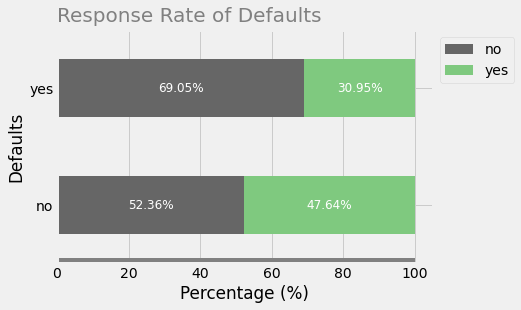

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_defaults.plot(x = 'defaults', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of Defaults', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Defaults')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_defaults)):
        plt.text(x = proportion_defaults['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_defaults['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_defaults['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_defaults['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

<Figure size 720x1440 with 0 Axes>

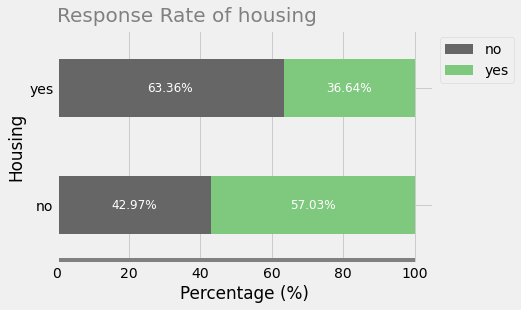

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_housing.plot(x = 'housing', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of housing', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Housing')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_housing)):
        plt.text(x = proportion_housing['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_housing['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_housing['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_housing['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

<Figure size 720x1440 with 0 Axes>

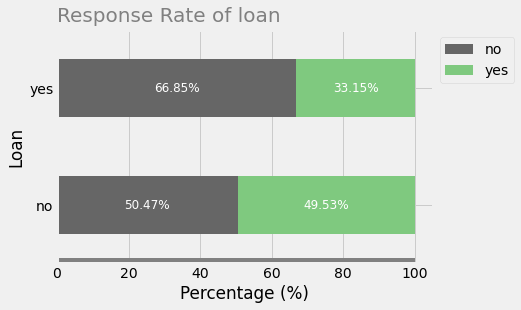

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_loan.plot(x = 'loan', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of loan', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Loan')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_loan)):
        plt.text(x = proportion_loan['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_loan['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_loan['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_loan['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

* Terlihat bahwa customer yang memiliki kredit kemungkinan besar akan menolak campaign, sehingga tidak disarankan melakukan campaign pada customer yang memiliki kredit.
* Terlihat bahwa customer yang memiliki pinjaman rumah lebih dominan menolak campaign, dan campaign terbanyak diterima jika customer tidak memiliki pinjaman rumah sehingga ada kemungkinan yang lebih besar campaign akan diterima jika campaign dilakukan pada customer yang tidak memiliki pinjaman rumah.
* Terlihat bahwa customer yang tidak memiliki pinjaman lebih dominan menolak campaign, namun campaign terbanyak diterima pada customer yang tidak memiliki campaign. Sehingga ada kemungkinan yang lebih besar campaign akan diterima jika campaign dilakukan pada customer yang tidak memiliki pinjaman.

In [37]:
proportion_contact = create_df_target_rate(dataset, 'contact', 'response')
proportion_poutcome = create_df_target_rate(dataset, 'poutcome', 'response')

<Figure size 720x1440 with 0 Axes>

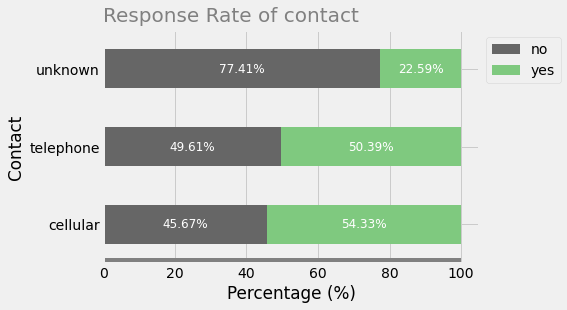

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_contact.plot(x = 'contact', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of contact', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Contact')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_contact)):
        plt.text(x = proportion_contact['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_contact['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_contact['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_contact['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

<Figure size 720x1440 with 0 Axes>

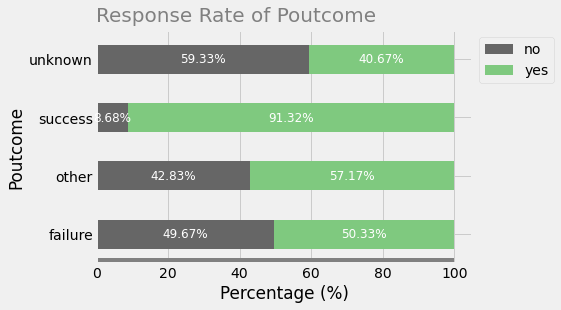

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 20))
proportion_poutcome.plot(x = 'poutcome', y = 'Rate', kind='barh', stacked = True, colormap = 'Accent_r')
plt.title('Response Rate of Poutcome', y = 1.01, fontsize = 20, color = 'gray', loc = 'left')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Percentage (%)')
plt.ylabel('Poutcome')
plt.hlines(y = -0.5, xmin = 0, xmax = 100, linewidth = 10, colors = 'grey')

for y_index in range(0, len(proportion_poutcome)):
        plt.text(x = proportion_poutcome['Rate']['no'].iloc[y_index] / 2, y = y_index, s = "{:.2f}%".format(proportion_poutcome['Rate']['no'].iloc[y_index]), ha = 'center', va = 'center', color = 'white', fontsize = 12)
        plt.text(x = (proportion_poutcome['Rate']['no'].iloc[y_index] + 100) / 2, y = y_index, s = "{:.2f}%".format(proportion_poutcome['Rate']['yes'].iloc[y_index]), ha = 'center', va = 'center', color = 'white',fontsize = 12)

plt.show()

* Terlihat bahwa jenis media cellular ada kemungkinan yang lebih besar campaign akan di terima.
* Terlihat bahwa jika hasil campaign sebelumnya berhasil maka, hasil response selanjutnya kemungkinan juga berhasil.

## Summary EDA
1. Tidak terdapat missing value
2. Terdapat invalid data values pada feature balance dan pdays
3. Tidak terdapat duplicated data
4. Distribusi Target terlihat seimbang
5. Terlihat secara umum distribusi feature numerik sudah normal, hanya ada beberapa saja yang skew
6. Karakteristik customer bank XYZ adalah seorang pekerja yang berumur 32 hingga 49 yang sudah menikah, dan memiliki tingkat pendidikan secondary, memiliki penghasilan dengan kategori tinggi dan secara umum tidak memiliki kredit, pinjaman rumah maupun hutang.
7. Terlihat ada kecenderungan semakin pendek call duration, maka akan semakin tinggi kemungkinan untuk menolak campaign
8. Campaign akan cenderung di terima pada seorang pelajar, status perkawinannya single, tingkat pendidikannya tertiary, secara default tidak memiliki kredit, tidak memiliki pinjaman rumah, tidak memiliki pinjaman, dihubungi melalui celluar dan hasil campaign sebelumnya sukses

# Data Preprocessing

In [40]:
df1 = dataset.copy()

In [41]:
df1['pdays'] = df1['pdays'].replace(-1, 0)

In [42]:
#masking nilai negatif pada balance
df1 = df1[(df1['balance'] >= 0)]
df1.shape

(10474, 20)

In [43]:
#change data type feature day
df1['day'] = df1['day'].apply(str)

Text(0.5, 0, '')

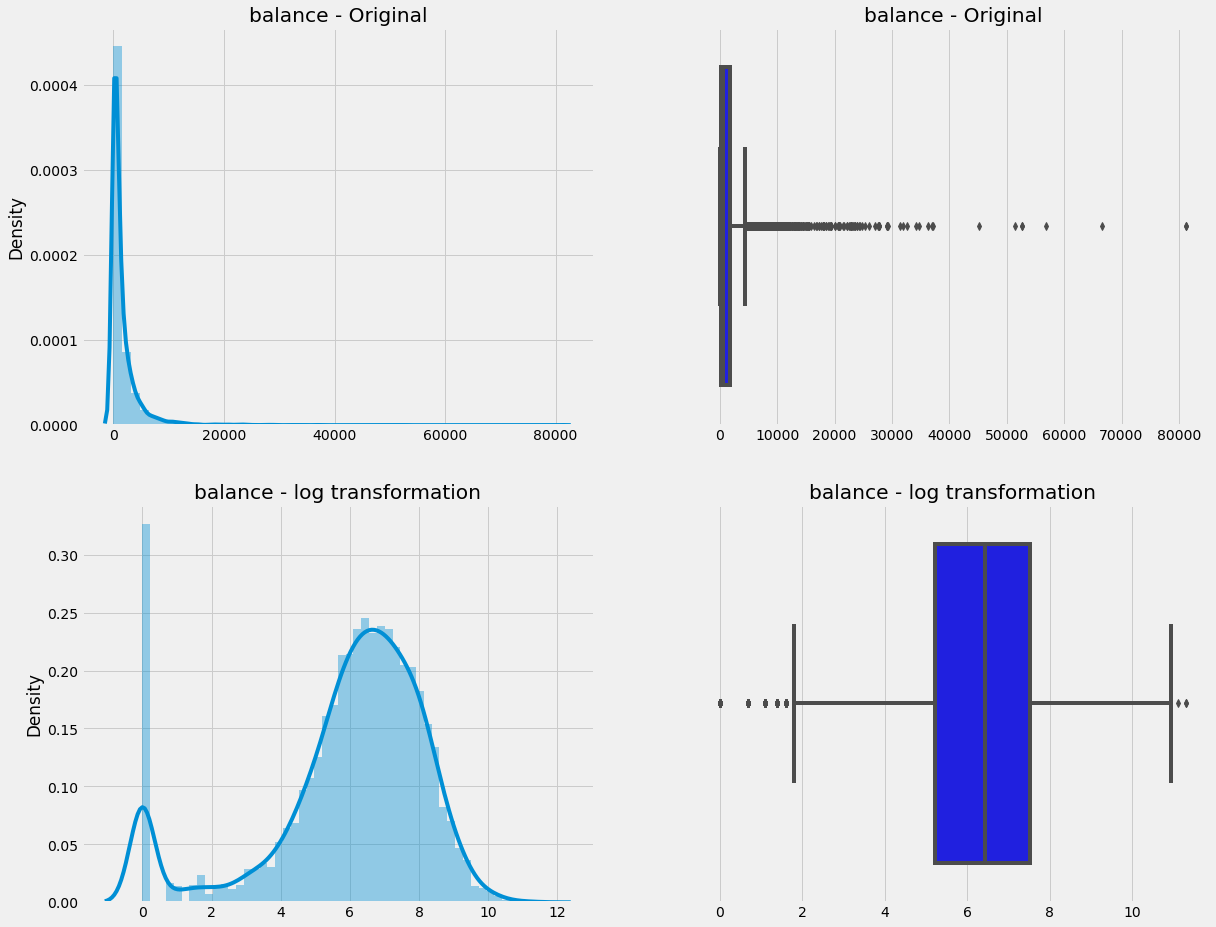

In [44]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(df1['balance'],kde=True, ax=ax[0,0])
ax[0,0].set_title('balance - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df1['balance'],color='blue',orient='h', ax=ax[0,1])
ax[0,1].set_title('balance - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(df1['balance']),kde=True, ax=ax[1,0])
ax[1,0].set_title('balance - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(df1['balance']),color='blue',orient='h', ax=ax[1,1])
ax[1,1].set_title('balance - log transformation')
ax[1,1].set_xlabel('')

In [45]:
df1['balance'] = np.log1p(df1['balance'])

Text(0.5, 0, '')

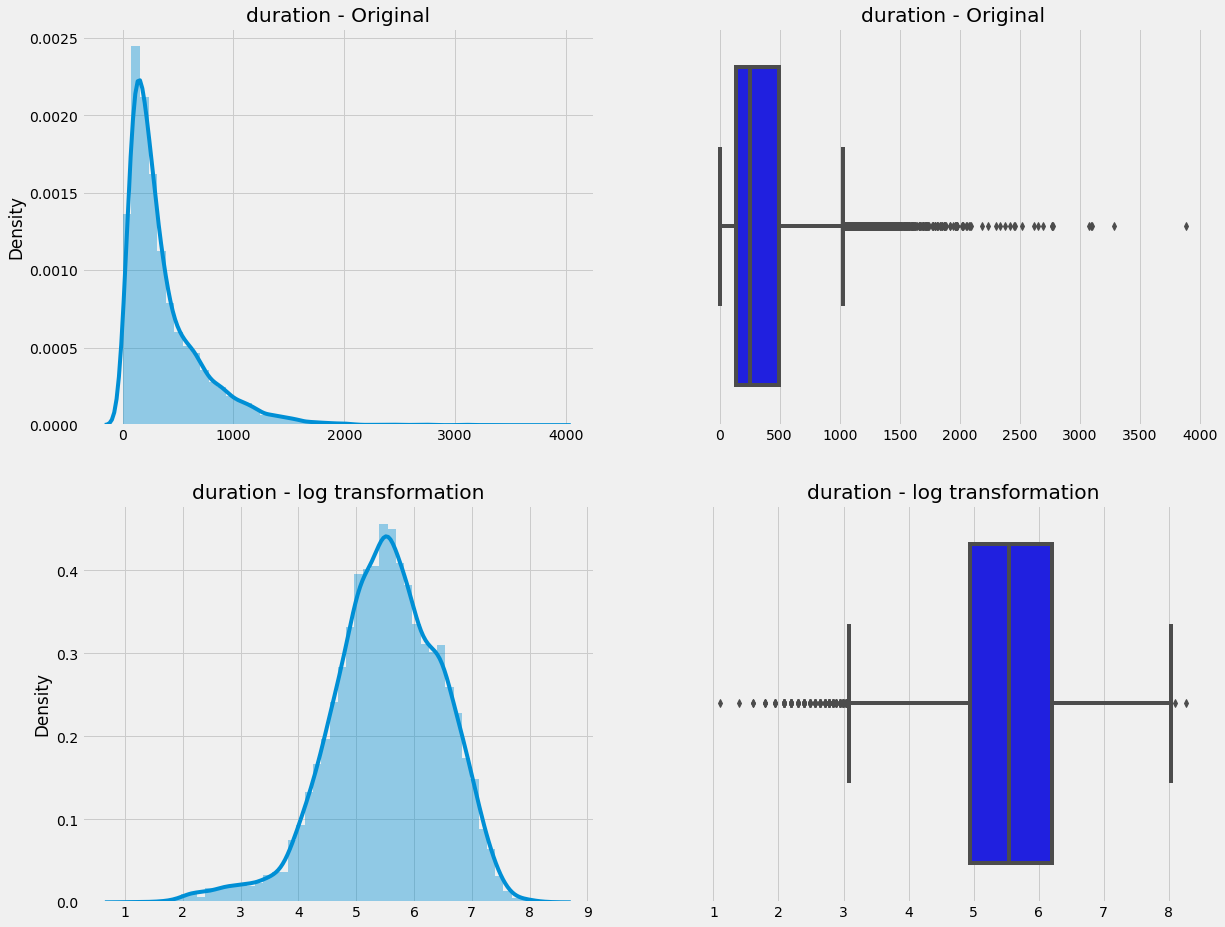

In [46]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(df1['duration'],kde=True, ax=ax[0,0])
ax[0,0].set_title('duration - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df1['duration'],color='blue',orient='h', ax=ax[0,1])
ax[0,1].set_title('duration - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(df1['duration']),kde=True, ax=ax[1,0])
ax[1,0].set_title('duration - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(df1['duration']),color='blue',orient='h', ax=ax[1,1])
ax[1,1].set_title('duration - log transformation')
ax[1,1].set_xlabel('')

In [47]:
df1['duration'] = np.log1p(df1['duration'])

Text(0.5, 0, '')

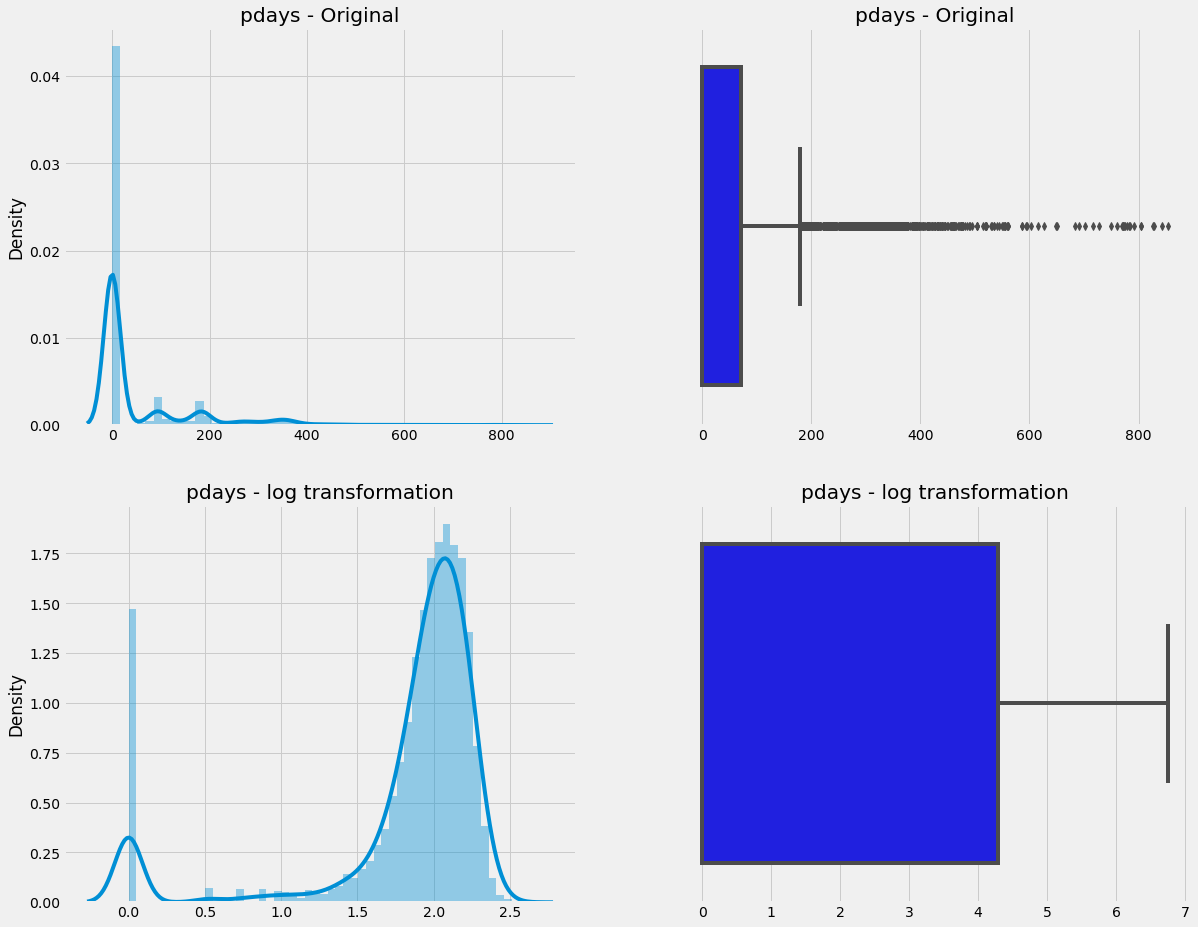

In [48]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(df1['pdays'],kde=True, ax=ax[0,0])
ax[0,0].set_title('pdays - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df1['pdays'],color='blue',orient='h', ax=ax[0,1])
ax[0,1].set_title('pdays - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(df1['balance']),kde=True, ax=ax[1,0])
ax[1,0].set_title('pdays - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(df1['pdays']),color='blue',orient='h', ax=ax[1,1])
ax[1,1].set_title('pdays - log transformation')
ax[1,1].set_xlabel('')

In [49]:
df1['pdays'] = np.log1p(df1['pdays'])

Text(0.5, 0, '')

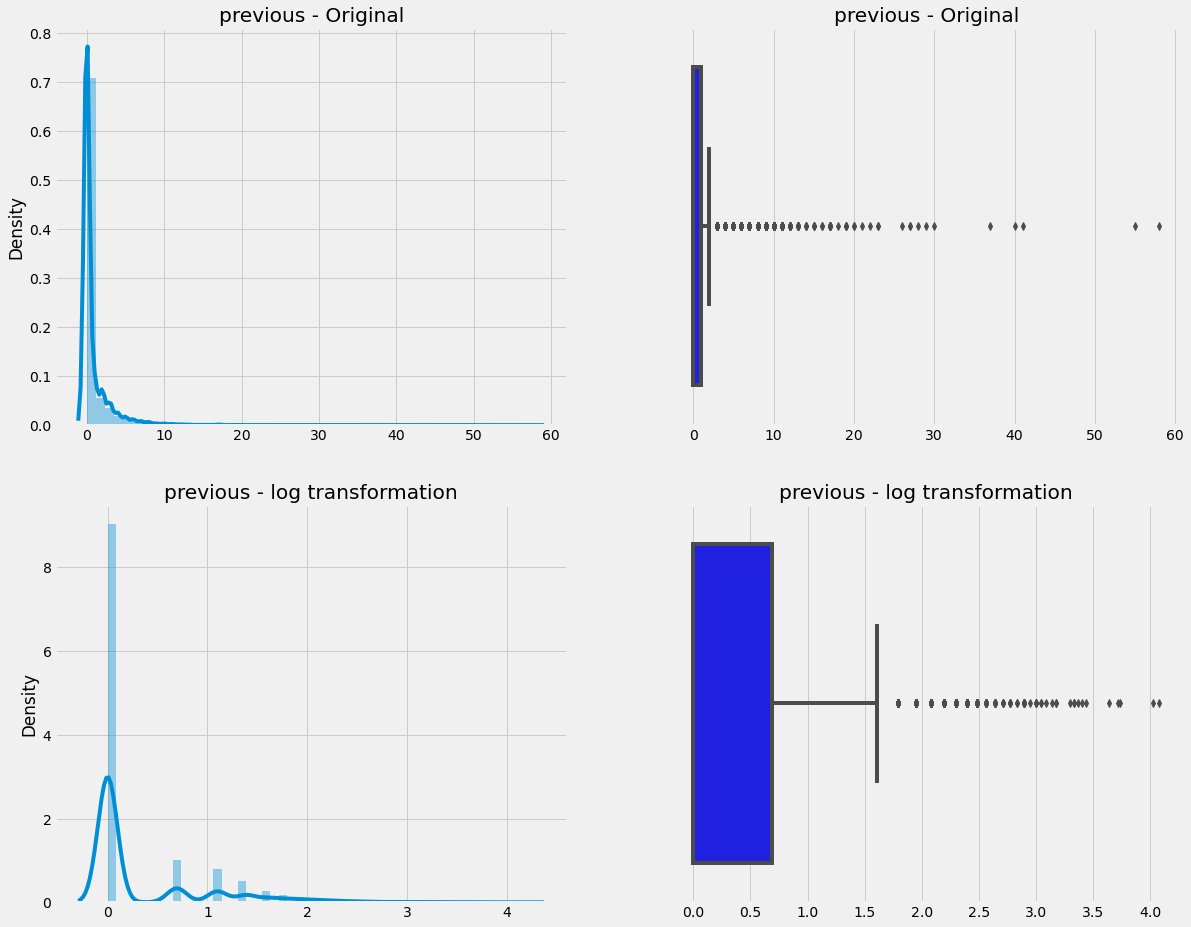

In [50]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(df1['previous'],kde=True, ax=ax[0,0])
ax[0,0].set_title('previous - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df1['previous'],color='blue',orient='h', ax=ax[0,1])
ax[0,1].set_title('previous - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(df1['previous']),kde=True, ax=ax[1,0])
ax[1,0].set_title('previous - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(df1['previous']),color='blue',orient='h', ax=ax[1,1])
ax[1,1].set_title('previous - log transformation')
ax[1,1].set_xlabel('')

In [51]:
df1['previous'] = np.log1p(df1['previous'])

Text(0.5, 0, '')

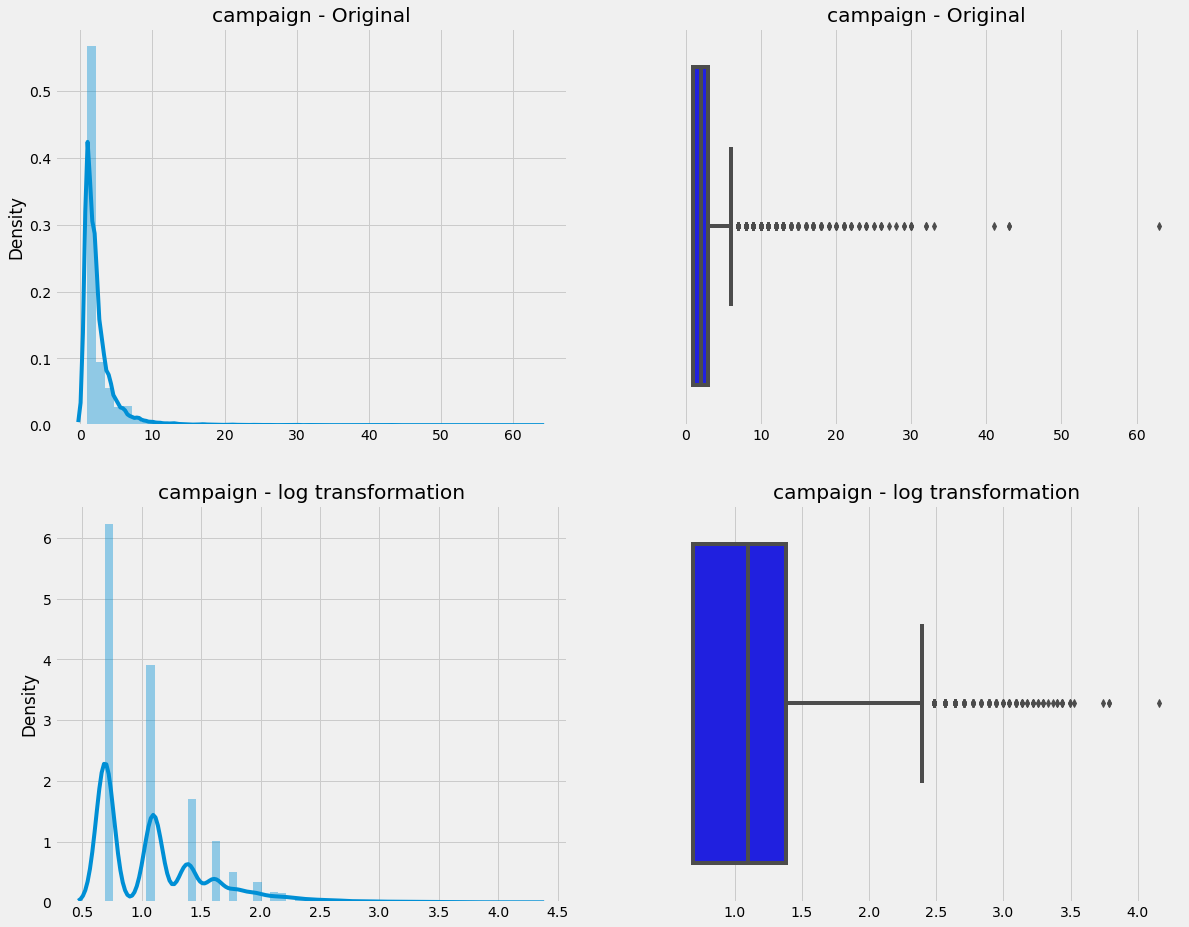

In [52]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(df1['campaign'],kde=True, ax=ax[0,0])
ax[0,0].set_title('campaign - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df1['campaign'],color='blue',orient='h', ax=ax[0,1])
ax[0,1].set_title('campaign - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(df1['campaign']),kde=True, ax=ax[1,0])
ax[1,0].set_title('campaign - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(df1['campaign']),color='blue',orient='h', ax=ax[1,1])
ax[1,1].set_title('campaign - log transformation')
ax[1,1].set_xlabel('')

In [53]:
df1['campaign'] = np.log1p(df1['campaign'])

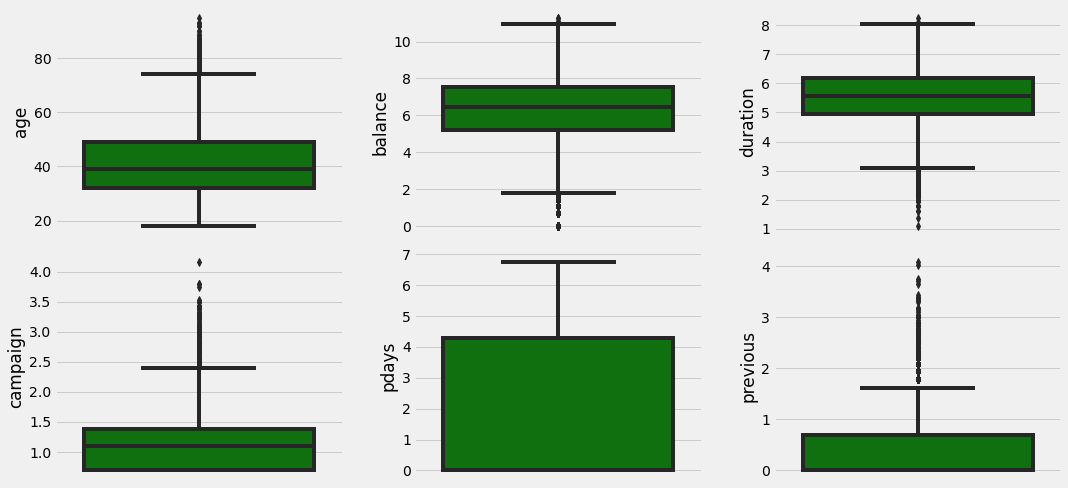

In [54]:
#Check Outlier
num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_features)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df1[num_features[i]],color='green',orient='v')

plt.tight_layout()
plt.show()

In [55]:
#masking outlier
Q1 = (df1[num_features]).quantile(0.25)
Q3 = (df1[num_features]).quantile(0.75)

In [56]:
IQR = Q3 - Q1 
IQR

age         17.000000
balance      2.302181
duration     1.260387
campaign     0.693147
pdays        4.287011
previous     0.693147
dtype: float64

In [57]:
for col_name in list(num_features):
    df1 = df1[~(df1[col_name] < Q1[col_name] - 1.5 * IQR[col_name])] #masking data < low limit
    df1 = df1[~(df1[col_name] > Q3[col_name] + 1.5 * IQR[col_name])] #masking > high limit

In [58]:
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris setelah memfilter outlier: 8611


## Feature Engineering

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['defaults', 'housing', 'loan', 'response']

for index in cols:
    df1[index] = le.fit_transform(df1[index]);

In [60]:
df1.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [61]:
education_dict = {"unknown": 0, "primary":1, "secondary": 2, "tertiary": 3}
df1 = df1.replace({"education": education_dict})

In [62]:
data_kategorikal

Index(['job', 'marital', 'education', 'defaults', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'response'],
      dtype='object')

In [63]:
df1.head()

,age,job,marital,education,defaults,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,age_category,balance_category,Id
0,59,admin.,married,2,0,7.759614,1,0,unknown,5,may,6.949856,0.693147,0.0,0.0,unknown,1,Lansia,High,0
1,56,admin.,married,2,0,3.828641,0,0,unknown,5,may,7.291656,0.693147,0.0,0.0,unknown,1,Lansia,Low,1
2,41,technician,married,2,0,7.147559,1,0,unknown,5,may,7.237059,0.693147,0.0,0.0,unknown,1,Dewasa,High,2
3,55,services,married,2,0,7.814803,1,0,unknown,5,may,6.363028,0.693147,0.0,0.0,unknown,1,Lansia,High,3
4,54,admin.,married,3,0,5.220356,0,0,unknown,5,may,6.513230,1.098612,0.0,0.0,unknown,1,Lansia,Medium,4


In [64]:
job_one_hot = pd.get_dummies(df1['job'])
marital_one_hot = pd.get_dummies(df1['marital'])
contact_one_hot = pd.get_dummies(df1['contact'])
poutcome_one_hot = pd.get_dummies(df1['poutcome'])
month_one_hot = pd.get_dummies(df1['month'])

In [65]:
df1 = pd.concat([df1, job_one_hot], axis = 1)
df1 = pd.concat([df1, marital_one_hot], axis = 1)
df1 = pd.concat([df1, contact_one_hot], axis = 1)
df1 = pd.concat([df1, poutcome_one_hot], axis = 1)
df1 = pd.concat([df1, month_one_hot], axis = 1)

df1 = df1.drop(['job', 'marital', 'contact', 'poutcome', 'month'], axis = 1)

df1.head()

,age,education,defaults,balance,housing,loan,day,duration,campaign,pdays,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,59,2,0,7.759614,1,0,5,6.949856,0.693147,0.0,...,0,0,0,0,0,0,1,0,0,0
1,56,2,0,3.828641,0,0,5,7.291656,0.693147,0.0,...,0,0,0,0,0,0,1,0,0,0
2,41,2,0,7.147559,1,0,5,7.237059,0.693147,0.0,...,0,0,0,0,0,0,1,0,0,0
3,55,2,0,7.814803,1,0,5,6.363028,0.693147,0.0,...,0,0,0,0,0,0,1,0,0,0
4,54,3,0,5.220356,0,0,5,6.513230,1.098612,0.0,...,0,0,0,0,0,0,1,0,0,0


## Multivariate Analysis

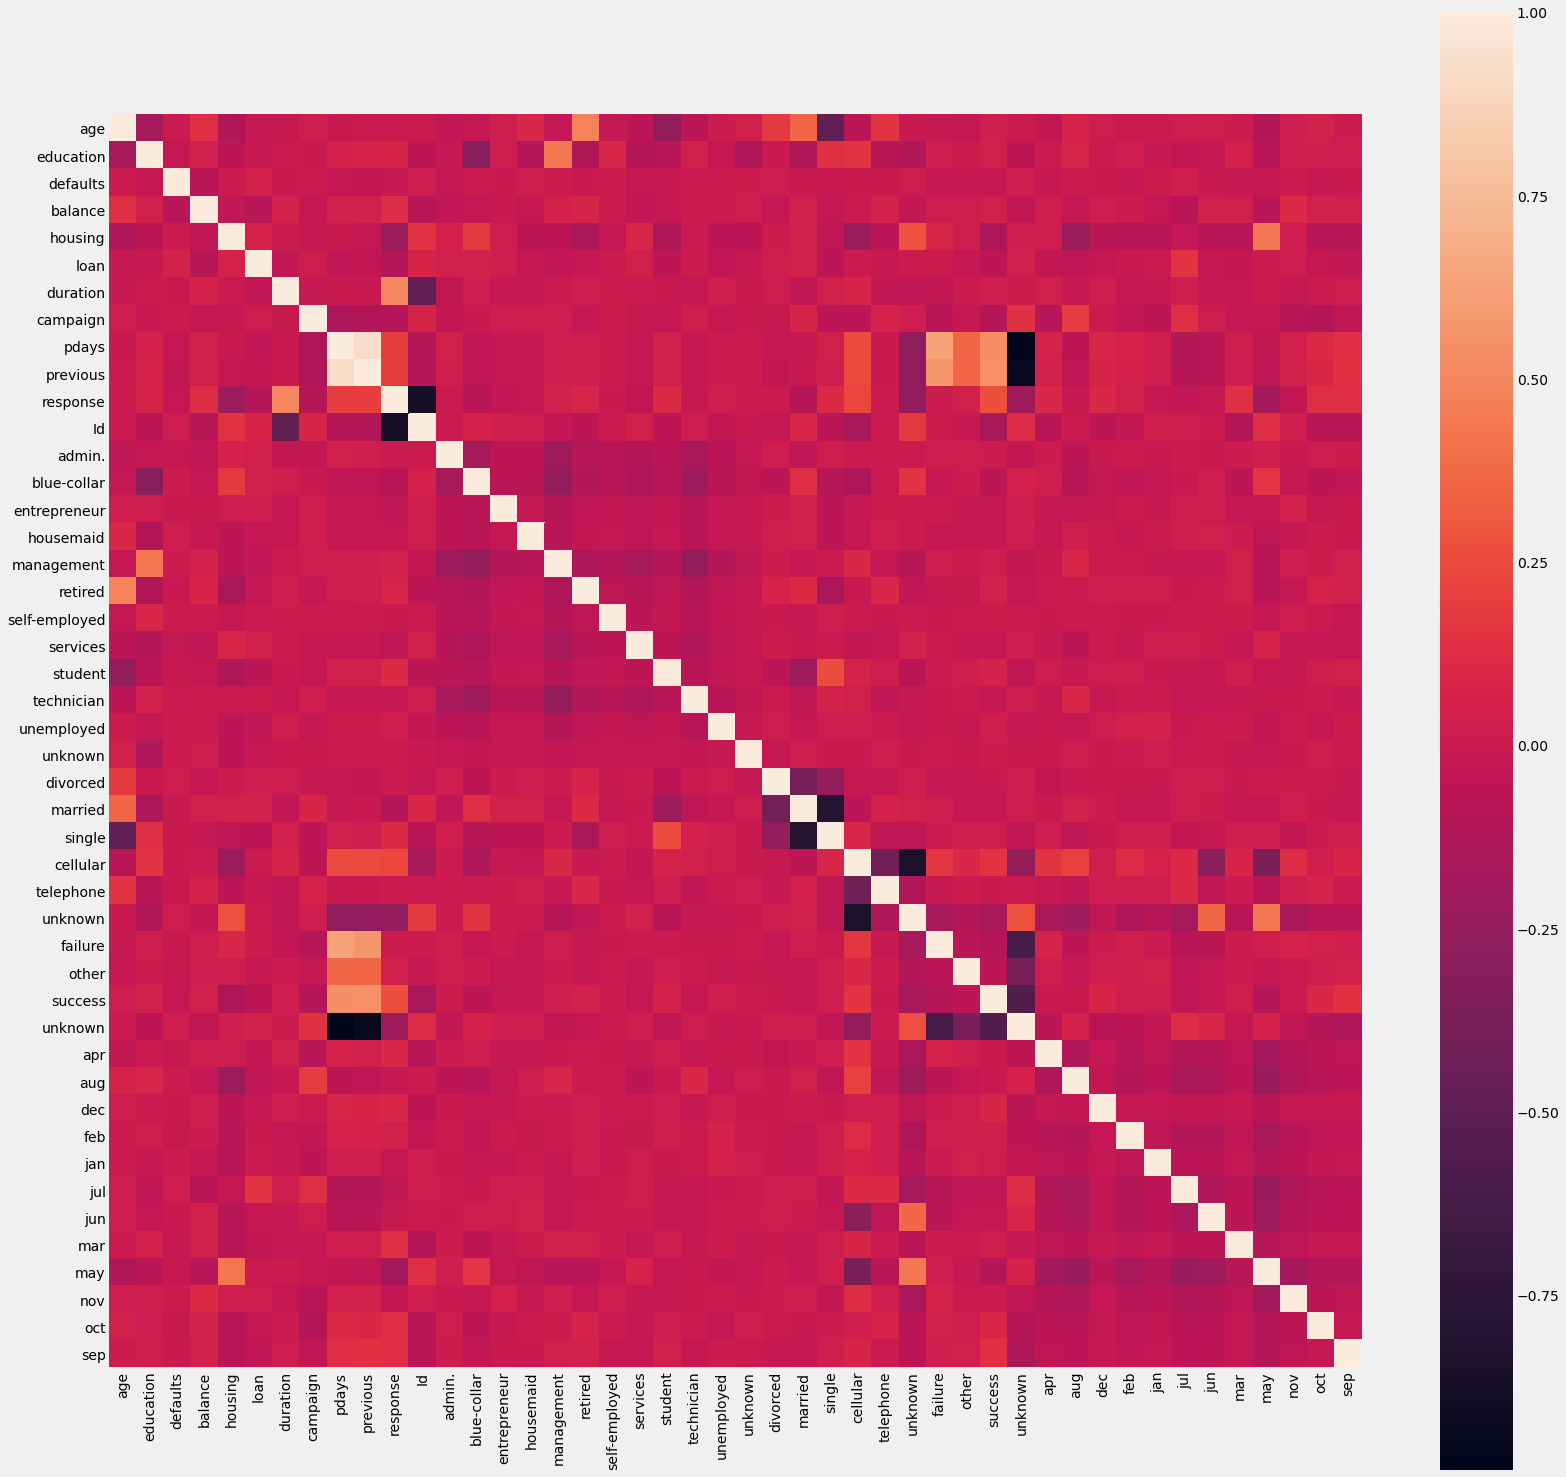

In [66]:
corr_mat = df1.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_mat, square = True)
# bottom, top = grafik.get_ylim()
# grafik.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [67]:
print("Find most important features relative to target")
corr = df1.corr()
corr.sort_values(['response'], ascending=False, inplace=True)
corr.response

Find most important features relative to target


response         1.000000
duration         0.504020
success          0.266002
cellular         0.231198
previous         0.199564
pdays            0.198054
mar              0.132416
sep              0.131036
oct              0.129468
balance          0.118947
student          0.103350
single           0.101419
dec              0.093228
apr              0.090437
retired          0.080199
education        0.072933
feb              0.047190
management       0.045898
other            0.039202
unemployed       0.036621
failure          0.012061
telephone        0.007347
divorced         0.003524
admin.           0.000927
age             -0.000326
unknown         -0.001451
self-employed   -0.003203
aug             -0.011347
jun             -0.014043
technician      -0.015418
jan             -0.021545
housemaid       -0.024431
defaults        -0.032504
nov             -0.034932
jul             -0.043600
entrepreneur    -0.044792
services        -0.050369
blue-collar     -0.087039
married     

In [68]:
X = df1.drop(['Id', 'age_category', 'balance_category', 'response'], axis = 1)
y = df1['response']

In [69]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

In [70]:
print ("X_train :", X_train.shape)
print ("X_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

X_train : (6027, 45)
X_test : (2584, 45)
y_train : (6027,)
y_test : (2584,)


## Modelling

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [72]:
def evaluation_score(y_pred_training, y_pred_testing):
    confusion_matrix_training_df = pd.DataFrame((confusion_matrix(y_train, y_pred_training)), ('No', 'Yes'), ('No', 'Yes'))
    confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_testing)), ('No', 'Yes'), ('No', 'Yes'))
    #plt.figure(figsize = (5,5))
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    heatmap_training = sns.heatmap(confusion_matrix_training_df, annot=True, annot_kws={'size': 20}, fmt='d', cmap = 'Blues', ax= axes[0])
    heatmap_training.yaxis.set_ticklabels(heatmap_training.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap_training.xaxis.set_ticklabels(heatmap_training.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    
    axes[0].set_title('Confusion Matrix for Training', fontsize=20, color='darkblue')
    axes[0].text(
       x = 0, 
       y = 3.2, 
       s = 'Evaluation Score Training:\n1. Acuracy Score   : {:.2f}\n\n2. Precision Score   : {:.2f}\n\n3. Recall Score   : {:.2f}\n\n4. F1-Score   : {:.2f}'.format(accuracy_score(y_train, y_pred_training), precision_score(y_train, y_pred_training),recall_score(y_train, y_pred_training),f1_score(y_train, y_pred_training))
    )
    axes[0].set_ylabel('True Label', fontsize=20)
    axes[0].set_xlabel('Predicted Label', fontsize=20)
    
    heatmap_testing = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 20}, fmt='d', cmap = 'Blues', ax= axes[1])
    heatmap_testing.yaxis.set_ticklabels(heatmap_testing.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap_testing.xaxis.set_ticklabels(heatmap_testing.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    
    axes[1].set_title('Confusion Matrix for Testing', fontsize=20, color='darkblue')
    axes[1].text(
       x = 0, 
       y = 3.2, 
       s = 'Evaluation Score Testing:\n1. Acuracy Score   : {:.2f}\n\n2. Precision Score   : {:.2f}\n\n3. Recall Score   : {:.2f}\n\n4. F1-Score   : {:.2f}'.format(accuracy_score(y_test, y_pred_testing), precision_score(y_test, y_pred_testing),recall_score(y_test, y_pred_testing),f1_score(y_test, y_pred_testing))
    )
    axes[1].set_ylabel('True Label', fontsize=20)
    axes[1].set_xlabel('Predicted Label', fontsize=20)
    plt.tight_layout()
    plt.show()

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])
        
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.title('Feature Importance Score', loc = 'left', fontsize = 24, color = 'grey', weight = 'bold', va = 'center')
    plt.xlabel('Score', fontsize = 20)
    plt.ylabel('Feature', fontsize = 20)
    
#     for index in range (0, len(feat_importances)):
#         plt.text(x = feat_importances.nlargest(25)[index] + 0.001, y = index, s = '{:.2f}'.format(feat_importances.nlargest(25)[index]), va = 'center')

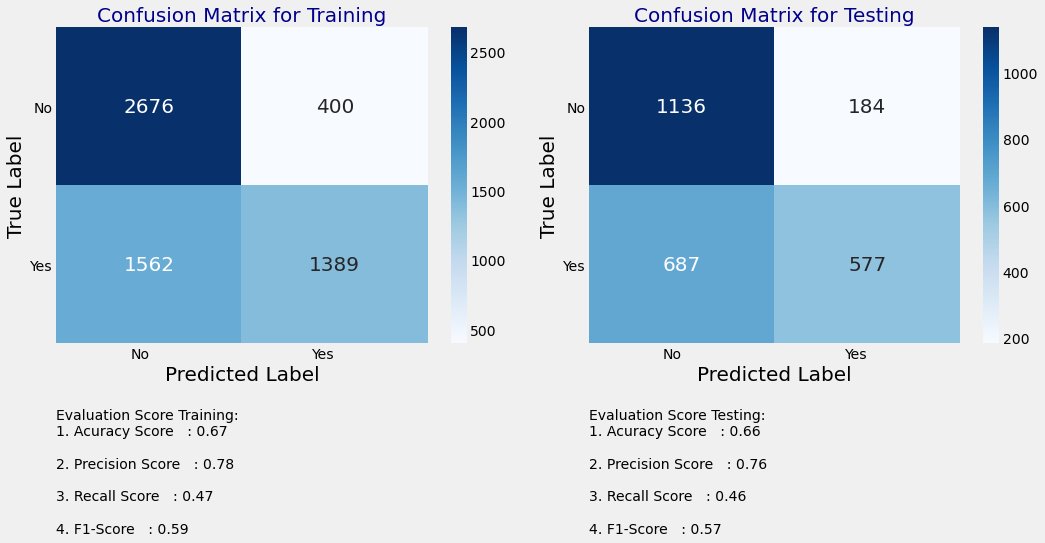

In [73]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_predicted_train = naive_bayes.predict(X_train)
y_predicted_test = naive_bayes.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

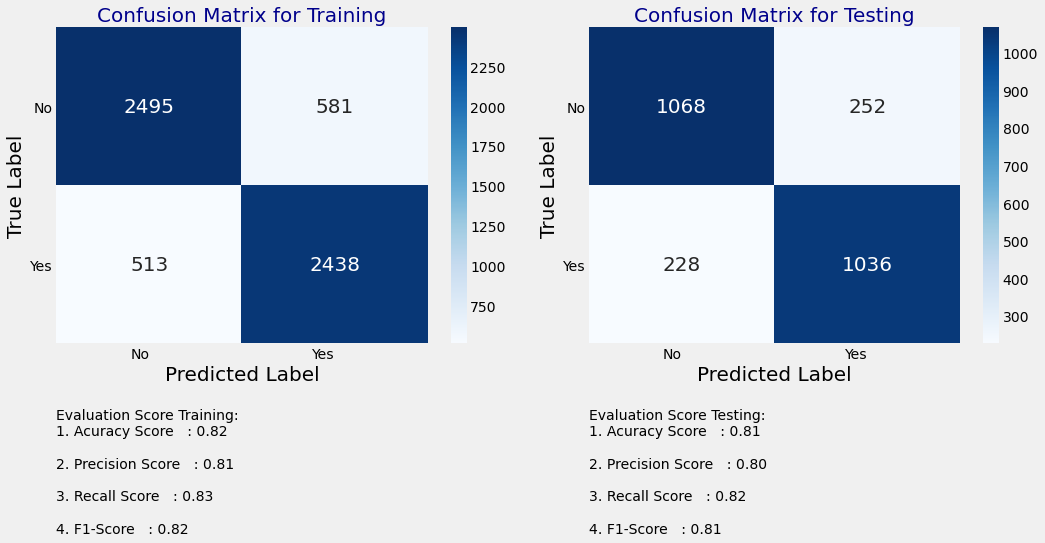

In [74]:
Logistic_Regression = LogisticRegression(random_state=42)
Logistic_Regression.fit(X_train, y_train)

y_predicted_train = Logistic_Regression.predict(X_train)
y_predicted_test = Logistic_Regression.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

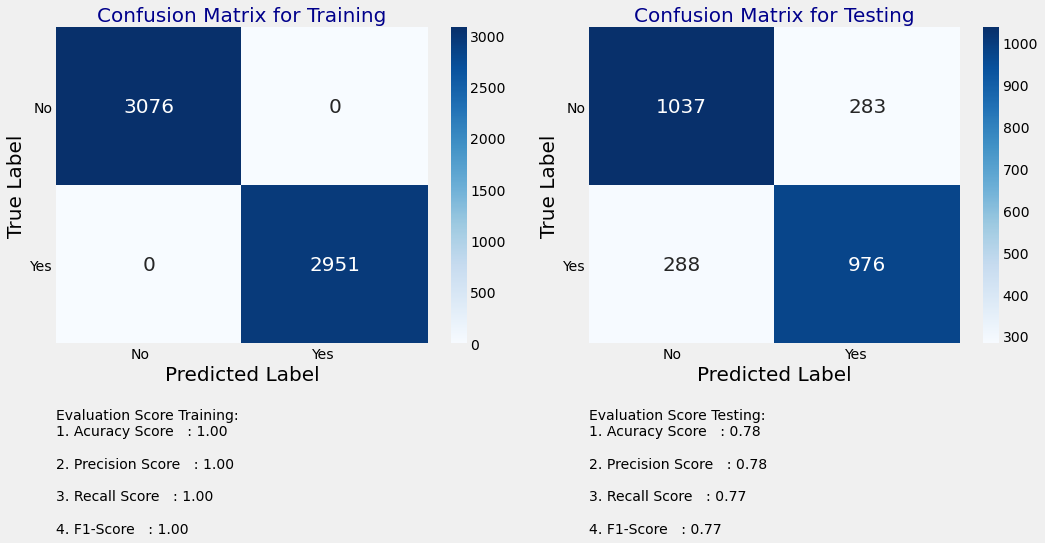

In [75]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)

y_predicted_train = Decision_Tree.predict(X_train)
y_predicted_test = Decision_Tree.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

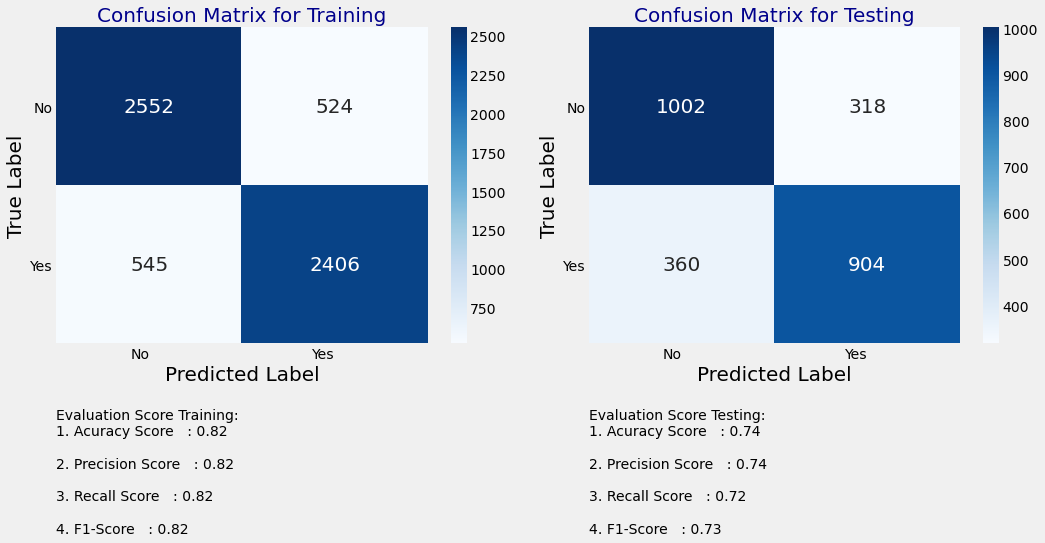

In [76]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

y_predicted_train = KNN.predict(X_train)
y_predicted_test = KNN.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

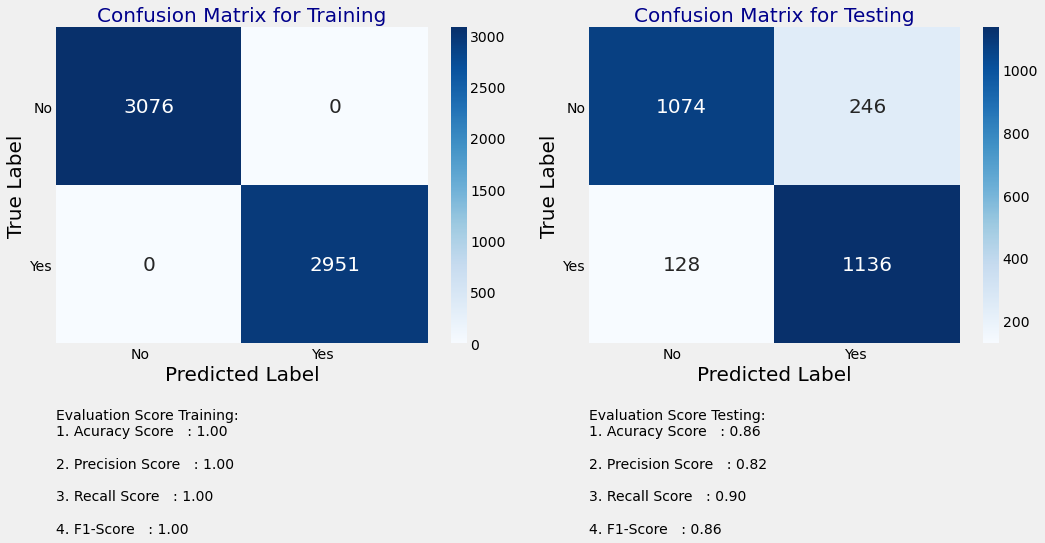

In [77]:
random_forest =  RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_predicted_train = random_forest.predict(X_train)
y_predicted_test = random_forest.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

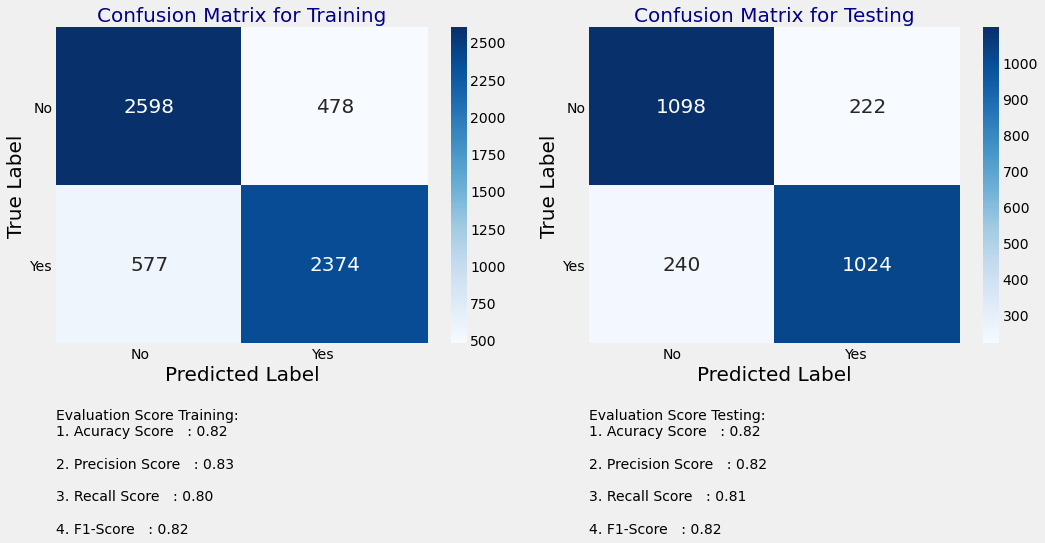

In [78]:
Adaboost = AdaBoostClassifier(random_state=42)
Adaboost.fit(X_train, y_train)

y_predicted_train = Adaboost.predict(X_train)
y_predicted_test = Adaboost.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

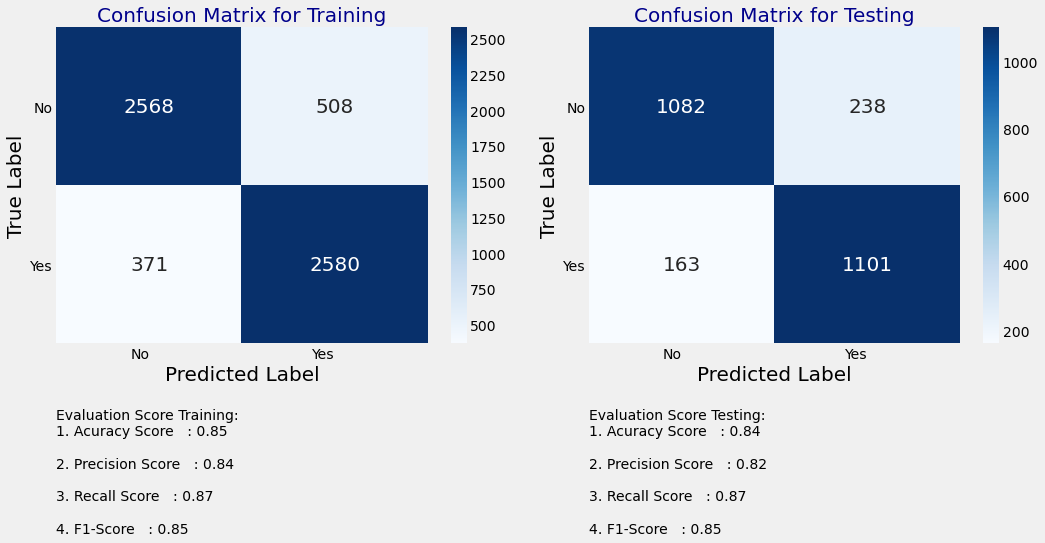

In [79]:
Gradient= GradientBoostingClassifier(random_state=42)
Gradient.fit(X_train, y_train)

y_predicted_train = Gradient.predict(X_train)
y_predicted_test = Gradient.predict(X_test)

evaluation_score(y_predicted_train, y_predicted_test)

## Evaluation model

Karena target seimbang, dan kita ingin meningkatkan kualitas prediksi, yaitu dengan meminimalisir false negatif yang terjadi (Actual "Yes", Predicted "No") maka kita akan menggunakan evaluation score **Recall**.

Berdasarkan hasil evaluation score di atas kita ketahui bahwa model Gradient Boosting yang memiliki tingkat Recall tertinggi. Selain itu, model ini sangat baik karena tidak terjadi underfitting maupun overfitting.

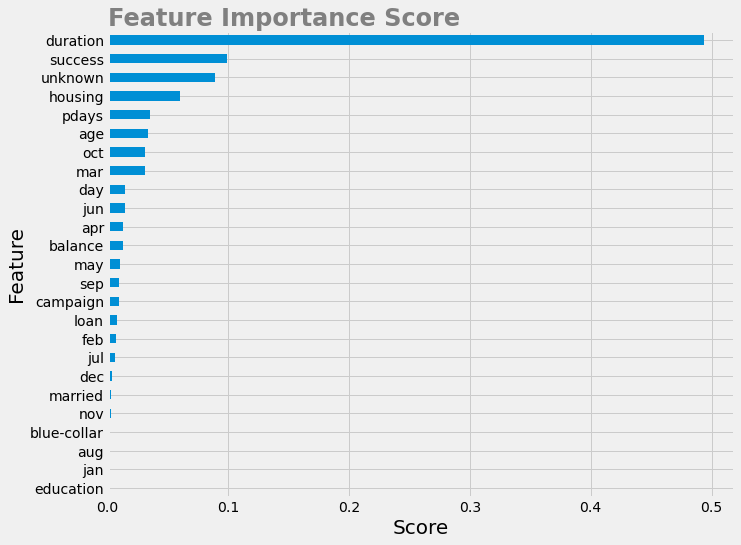

In [80]:
show_feature_importance(Gradient)

## Business Recomendation
Bisnis recommendation yang disarankan adalah ada usaha pencegahan dan usaha penanggulangan
1. Usaha Pencegahan <br>
   a. Melakukan improvement pelatihan untuk sales/agent bank XYZ dengan tim pelatihan yang tersedia agar dapat melakukan call duration di atas 4 menit dan menawarkan product secara lebih baik dan menarik. <br>
   b. Jika hasil campaign secara umum yang telah dilakukan sukses, maka dapat dilanjutkan untuk melakukan campaign pada customer-customer berikutnya dengan metode campaign yang sama. <br>
   c. Melakukan campaign pada customer yang memilki rumah (tidak kontrak) dan berumur pelajar kisaran 18 - 30 karena berdasarkan hasil EDA para pelajar lebih cenderung untuk berlangganan depisto. 

2. Usaha penanggulangan <br>
   Dengan machine learning tentunya kita dapat memprediksi hasil campaign yang akan terjadi, sehingga jika customer diprediksi menolak berlangganan deposito berjangka kita dapat mempersiapkan terlebih dahulu dengan penawaran yang lebih menarik dan memperkejakan senior sales untuk menangani customer tersebut.


Seluruh bisnis rekomendasi ini tidak memerlukan high cost untuk melakukan improvement, karena improvement bisa dilakukan dari pihak internal sendiri.

## Import to Pickle File

In [81]:
import pickle
pickle.dump(Gradient, open('gradient_boosting_model.pkl', 'wb'))